# Pharmacies

## Load the libraries and data

In [1]:
import numpy as np
import pandas as pd
import datetime

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

import warnings
warnings.filterwarnings('ignore')

all the data..

In [2]:
colnames = ['Date', 'Time', 'Ph_number', 'Ph_postcode', 'YOB', 'Gender', 'CNK', 'Product', 'ATC', 'Units', 'Price', 'Contribution']
df_all = pd.read_csv('C:/Users/letra/Desktop/huy/ADS-A/ADS-A pharmacy/ds.csv', names=colnames)

In [3]:
df_all.head(2)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution
0,01/01/2017,00:00,7341765,21,1924,1,1715119,AMOXICLAV SANDOZ 500MG/125 MG COMP 30,J01CR02,30,14.81,3.47
1,01/01/2017,00:00,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00


In [4]:
df_all.shape

(22705348, 12)

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705348 entries, 0 to 22705347
Data columns (total 12 columns):
Date            object
Time            object
Ph_number       int64
Ph_postcode     int64
YOB             int64
Gender          int64
CNK             int64
Product         object
ATC             object
Units           int64
Price           float64
Contribution    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 2.0+ GB


In [6]:
df_all.isnull().sum()

Date                  0
Time            4941181
Ph_number             0
Ph_postcode           0
YOB                   0
Gender                0
CNK                   0
Product               0
ATC                   0
Units                 0
Price                 0
Contribution          0
dtype: int64

In [7]:
df_all.describe()

,Ph_number,Ph_postcode,YOB,Gender,CNK,Units,Price,Contribution
count,2.270535e+07,2.270535e+07,2.270535e+07,2.270535e+07,2.270535e+07,2.270535e+07,2.270535e+07,2.270535e+07
mean,8.031142e+06,3.496216e+01,1.954498e+03,1.571832e+00,1.960846e+06,4.498157e+01,2.494228e+01,4.003821e+00
std,1.764944e+06,2.575097e+01,3.706748e+01,5.017270e-01,1.329533e+06,4.417011e+01,9.025505e+01,7.305994e+00
min,3.790968e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.195700e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.686732e+06,2.000000e+01,1.938000e+03,1.000000e+00,7.919960e+05,1.000000e+00,7.040000e+00,4.000000e-02
50%,7.905180e+06,2.400000e+01,1.951000e+03,2.000000e+00,2.055200e+06,3.000000e+01,1.156000e+01,2.140000e+00
75%,8.101962e+06,4.800000e+01,1.967000e+03,2.000000e+00,2.678951e+06,9.000000e+01,2.150000e+01,6.630000e+00
max,3.052274e+07,9.900000e+01,4.092000e+03,3.000000e+00,7.726284e+06,3.000000e+02,4.917340e+03,1.847120e+03


## Uni-variate analysis + data cleaning

#### Date and Time

In [8]:
df_all['DateTime'] = pd.to_datetime(df_all['Date'] + ' ' + df_all['Time'])
#df_all['Date'] = 

In [9]:
df_all['Time'].value_counts()

00:00    3418511
10:05      39610
10:07      39112
10:59      38922
10:14      38898
          ...   
03:56          1
05:05          1
04:07          1
06:16          1
04:47          1
Name: Time, Length: 1413, dtype: int64

#### Ph_postcode

In [10]:
df_all['Ph_postcode'].min(), df_all['Ph_postcode'].max()

(0, 99)

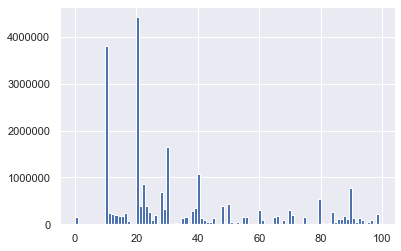

In [11]:
df_all['Ph_postcode'].hist(bins=100);

#### YOB

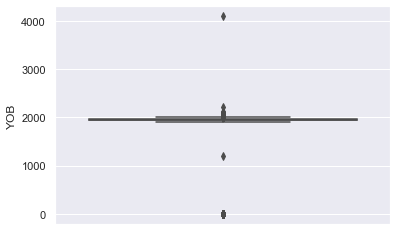

In [12]:
#df_all['YOB'].plot(kind='box');
sns.boxplot(y='YOB',data=df_all);

In [13]:
b_ghosts = ( (df_all['YOB'] < 1900) | (df_all['YOB'] > 2020) )
b_ghosts

0           False
1           False
2           False
3           False
4           False
            ...  
22705343    False
22705344    False
22705345    False
22705346    False
22705347    False
Name: YOB, Length: 22705348, dtype: bool

In [14]:
df_ghosts = df_all[b_ghosts]

nghosts = df_ghosts.shape[0]

ntotal = df_all.shape[0]

print("There are {} records (that is, {}% of the whole dataset) with persons that cannot be alive now."
      .format(nghosts,round((nghosts/ntotal)*100,2)))

There are 81612 records (that is, 0.36% of the whole dataset) with persons that cannot be alive now.


In [16]:
df_all.head(5)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime
0,01/01/2017,00:00,7341765,21,1924,1,1715119,AMOXICLAV SANDOZ 500MG/125 MG COMP 30,J01CR02,30,14.81,3.47,2017-01-01
1,01/01/2017,00:00,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,2017-01-01
2,01/01/2017,00:00,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,2017-01-01
3,01/01/2017,00:00,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,2017-01-01
4,01/01/2017,00:00,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,2017-01-01


In [17]:
df_all.drop ( df_all[b_ghosts].index, inplace=True )
df_all.reset_index(drop=True,inplace=True)

df_all.shape

(22623736, 13)

In [18]:
df_all.tail(2)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime
22623734,12/31/2019,23:56,7068483,90,1962,2,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00
22623735,12/31/2019,23:56,7068483,90,1962,2,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00


#### Gender

In [19]:
df_all['Gender'].value_counts()

2    13060176
1     9562686
0         854
3          20
Name: Gender, dtype: int64

3 is a very small group, ignore (unless in focus). Or merge 0 and 3, both small. 

In [20]:
dict_genders = {0:'Other', 1:'Male', 2: 'Female', 3: 'Other'}
df_all['Gender'] = df_all['Gender'].map(dict_genders)
df_all.head(2)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime
0,01/01/2017,00:00,7341765,21,1924,Male,1715119,AMOXICLAV SANDOZ 500MG/125 MG COMP 30,J01CR02,30,14.81,3.47,2017-01-01
1,01/01/2017,00:00,7341765,21,1922,Male,5520523,WACHTHONORARIUM,,0,4.90,0.00,2017-01-01


(1900, 2020)

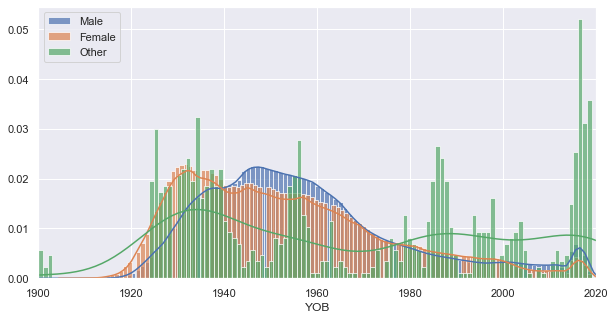

In [21]:
plt.figure(figsize=(10,5))

m_yob = df_all[df_all['Gender']=='Male']['YOB']
f_yob = df_all[df_all['Gender']=='Female']['YOB']
o_yob = df_all[df_all['Gender']=='Other']['YOB']

ax=sns.distplot(m_yob,bins=120,hist_kws={'alpha':0.7}, norm_hist=False)
sns.distplot(f_yob,bins=120,hist_kws={'alpha':0.7}, norm_hist=False)
sns.distplot(o_yob,bins=120,hist_kws={'alpha':0.7}, norm_hist=False)

plt.legend(['Male','Female','Other']);
ax.set_xlim(1900,2020)

The 'Other' category seems noisy, can also just be dropped :-)

In [22]:
df_all.drop(df_all[df_all['Gender']=='Other'].index,inplace=True)
df_all.reset_index(drop=True,inplace=True)
df_all.shape

(22622862, 13)

In [23]:
df_all.tail(2)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime
22622860,12/31/2019,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00
22622861,12/31/2019,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00


#### Product

In [24]:
df_products = df_all.groupby(['CNK','Product'])['Gender'].count().reset_index()

df_products.columns=['CNK','Product','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products.head()

,CNK,Product,Counts
9470,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,424557
5030,2542488,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,335563
1814,789537,ASAFLOW COMP 1 X 80 MG,189579
9471,5520523,WACHTHONORARIUM,175151
5117,2557163,PANTOMED 40 MG TABL 56,168337


## Make the dataset smaller

#### AREA 20

In [26]:
df_nguyen_filter = df_all[(df_all['Ph_postcode']==20)].reset_index(drop=True) 
df_nguyen_filter.shape

(4403544, 14)

In [28]:
df_s = df_nguyen_filter.sample(1000).reset_index(drop=True)
df_s.head(2)

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime,ProductType
0,08/25/2017,17:00,8027226,20,1990,Male,1201078,LOCOID CRELO EMULS 100ML 1MG/G,D07AB02,1,11.69,2.46,2017-08-25 17:00:00,NaN
1,07/31/2017,NaN,7802280,20,1938,Male,789537,ASAFLOW COMP 1 X 80 MG,B01AC06,0,0.03,0.01,NaT,NaN


In [29]:
for i in range(0, len(df_s)):
    if ('honorarium' in df_s.loc[i, 'Product'].lower()): 
        df_s.loc[i, 'ProductType'] = 'Honorarium'
    else:
        df_s.loc[i, 'ProductType'] = 'Pills'

df_s.head()

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,DateTime,ProductType
0,08/25/2017,17:00,8027226,20,1990,Male,1201078,LOCOID CRELO EMULS 100ML 1MG/G,D07AB02,1,11.69,2.46,2017-08-25 17:00:00,Pills
1,07/31/2017,NaN,7802280,20,1938,Male,789537,ASAFLOW COMP 1 X 80 MG,B01AC06,0,0.03,0.01,NaT,Pills
2,10/10/2019,18:35,4038423,20,1961,Male,468801,PROPRANOLOL EG COMP 100 X 40 MG,C07AA05,100,8.27,1.20,2019-10-10 18:35:00,Pills
3,07/08/2019,NaN,7981035,20,1936,Male,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.14,0.00,NaT,Honorarium
4,05/29/2019,12:48,9093729,20,1962,Female,40394,"EUMOVATE CREME 1 X 30 G 0,05%",D07AB01,1,9.13,1.58,2019-05-29 12:48:00,Pills


## Comparison plots

Which is more expensive, medication or honorarium?

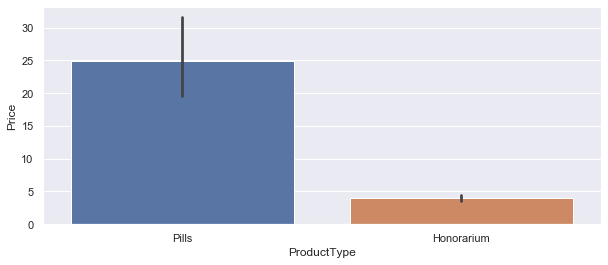

In [30]:
plt.figure(figsize=(10,4))
sns.barplot(x='ProductType', y='Price', data=df_s);

Most expensive products? top 10 ..

In [31]:
df_price_top10 = df_s.sort_values(by='Price',ascending=False).head(10)

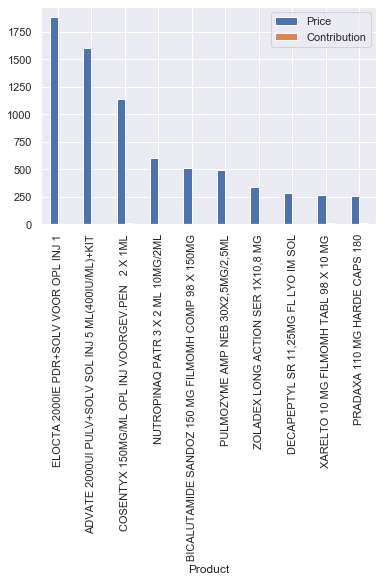

In [32]:
df_price_top10.set_index('Product',inplace=True)
dfp=df_price_top10[['Price','Contribution']]
dfp.plot.bar()

## Correlation plots

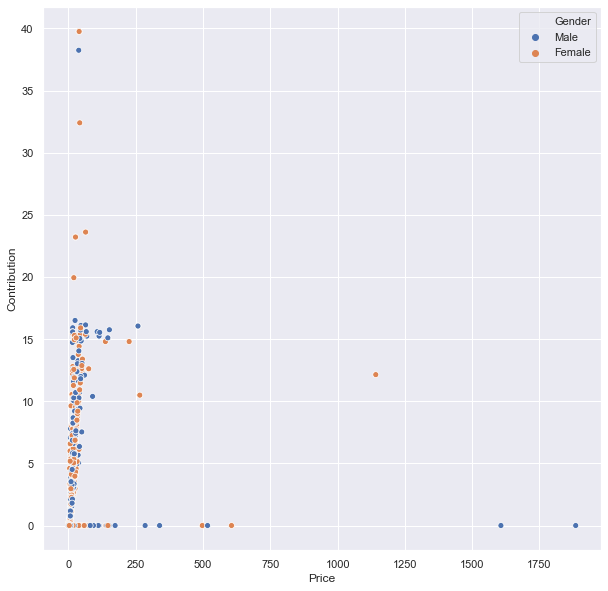

In [33]:
ax=plt.figure(figsize=(10,10))
sns.scatterplot(x='Price', y='Contribution', hue='Gender',data=df_s);

## Timelines

In [34]:
df_sales=df_s.groupby(['DateTime'])['Price'].sum().reset_index()
df_sales.set_index('DateTime',inplace=True)
df_sales.head()

,Price
DateTime,
2017-01-02 15:20:00,6.65
2017-01-03 17:54:00,9.91
2017-01-03 18:03:00,6.97
2017-01-04 10:40:00,13.09
2017-01-05 15:05:00,24.34


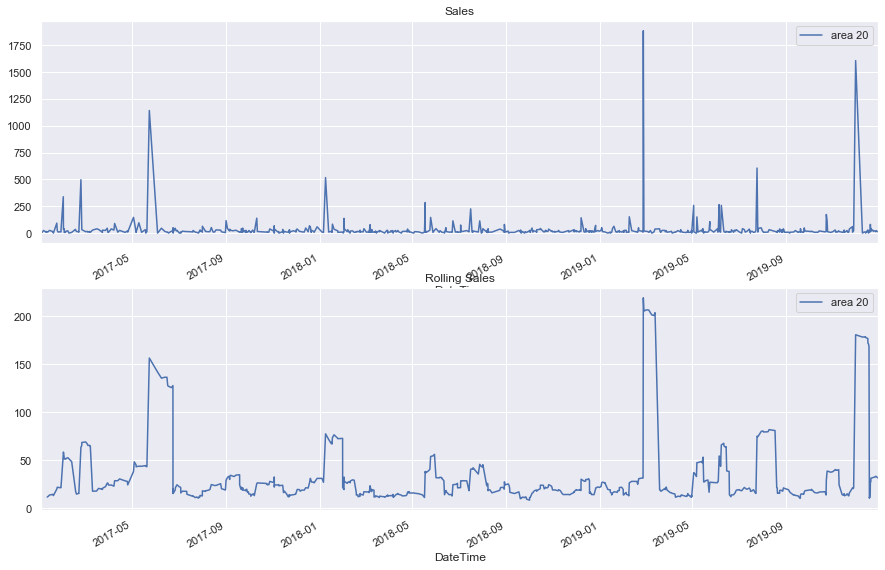

In [35]:
fig, ax = plt.subplots(2, 1,figsize=(15,10))
df_sales['Price'].plot(ax=ax[0],color="#4C72B0")
ax[0].set_title("Sales")
ax[0].legend(["area 20"])

df_sales['rp']=df_sales['Price'].rolling(10).mean()
df_sales['rp'].plot(ax=ax[1],color="#4C72B0")
ax[1].set_title("Rolling Sales")
ax[1].legend(["area 20"]);

(1910, 2020)

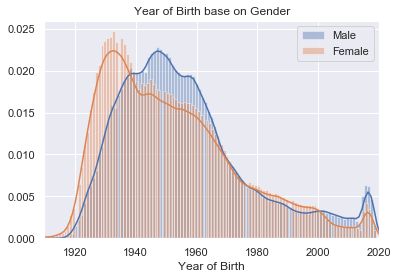

In [36]:
m_yob = df_nguyen_filter[df_nguyen_filter['Gender']=='Male']
f_yob = df_nguyen_filter[df_nguyen_filter['Gender']=='Female']

sns.set_style("darkgrid")

ax = sns.distplot(m_yob[['YOB']], bins = 120)
sns.distplot(f_yob[['YOB']], bins = 120)

plt.legend(['Male','Female','Neutral']);
plt.title('Year of Birth base on Gender')
plt.xlabel('Year of Birth')
plt.xlim(1910, 2020)